In [1]:
from astropy.table import Table, join, vstack
import sys
sys.path.append('../src')

import wdphoto

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.interpolate import RegularGridInterpolator

def read_cache(table):
    cache = Table.read(table)
    
    teff = np.unique(np.array(cache['teff']))
    logg = np.unique(np.array(cache['logg']))
    
    key_dict = {}
    raw_data = np.zeros((len(teff), len(logg), 271))
    
    #test.remove_columns(['teff', 'logg'])
    for i in range(len(teff)):
        for j in range(len(logg)):
            teff_loc = np.where(cache['teff'] == teff[i])[0]
            logg_loc = np.where(cache['logg'] == logg[j])[0]
    
            k = np.intersect1d(teff_loc, logg_loc)[0]
            raw_data[i,j] = [cache[key][k] for key in cache.keys()[2:]]
            
    for ii, key in enumerate(cache.keys()[2:]):
        key_dict[key] = ii
            
    model_sed = RegularGridInterpolator((teff, logg), raw_data)
    
    return model_sed, key_dict
    
model_sed, key_dict = read_cache('/home/sarsene1/dev/wdphoto/caches/warwick_cache_table.csv')

In [3]:
#%%timeit
#n = model_sed((10000,8))

In [4]:
catalog = Table.read('raddi.csv')

In [5]:
catalog[0:3]

System,SOURCE_ID,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,e_gmag,e_bpmag,e_rpmag,Radius,Teff
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,152935195517952,45.92584336054053,0.8861107939012035,17.980106353759766,18.000093460083008,17.998868942260742,0.0015130783995822373,0.013217996211741332,0.013788312941508103,0.018,11641.26
2,288175125714560,44.287428493193936,0.7743463085708776,17.467531204223633,17.490589141845703,17.51779556274414,0.0015501767872426815,0.010535382064445955,0.013653327770129304,0.014,12133.889
3,298895364329216,44.443285007130946,1.0183527718560161,17.783056259155273,17.73702049255371,17.936655044555664,0.0014834472444328764,0.011114552747722923,0.03457267690225826,0.009,17060.824


In [6]:
out_cache, fig_cache = wdphoto.fit.fit_parameters(catalog[0:30], source_id_key = 'SOURCE_ID', coord_keys = ('ra', 'dec'), 
                                      photo_keys = ('phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag'), e_photo_keys = ('e_gmag', 'e_bpmag', 'e_rpmag'),
                                      photo_bands = ('Gaia_G', 'Gaia_BP', 'Gaia_RP'), cachefile = '/home/sarsene1/dev/wdphoto/caches/warwick_cache_table.csv', 
                                      verbose_output = True, plot = True)

Integrating extinction map (this might take a couple of minutes)...
Optimizing map for querying (this might take a couple of seconds)...
 30%|███       | 9/30 [00:04<00:05,  4.08it/s]

Failed to fit source Gaia DR3 14141304376849280, appending -9999!


100%|██████████| 30/30 [00:07<00:00,  4.11it/s]


In [7]:
out_conv, fig_conv = wdphoto.fit.fit_parameters(catalog[0:30], source_id_key = 'SOURCE_ID', coord_keys = ('ra', 'dec'), 
                             photo_keys = ('phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag'), e_photo_keys = ('e_gmag', 'e_bpmag', 'e_rpmag'),
                           photo_bands = ('Gaia_G', 'Gaia_BP', 'Gaia_RP'), verbose_output = True, plot = True)

Integrating extinction map (this might take a couple of minutes)...
Optimizing map for querying (this might take a couple of seconds)...
100%|██████████| 30/30 [00:58<00:00,  1.97s/it]


Text(0, 0.5, 'Radius from cache table')

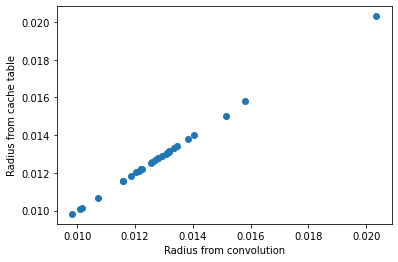

In [8]:
mask = np.all([out_cache['radius'] > 0], axis = 0)

plt.scatter(out_conv[mask]['radius'], out_cache[mask]['radius'])
plt.xlabel('Radius from convolution')
plt.ylabel('Radius from cache table')